# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplican diferentes modelos de árboles del decisión al dataset Iris:
1. Arbol de decisión
2. Random forest
3. Gradient boosting

Además hay que indicar la importancia de cada característica.

### 1. Gestión de datos

#### 1.1 Carga y creación del dataframe

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# Create pandas dataframe
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add 'target' column
df_iris['target'] = iris.target

# Add names
class_names = [iris.target_names[i] for i in iris.target]
df_iris['class'] = class_names

df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [2]:
# Get class and corresponding target
unique_values = df_iris[['class', 'target']].drop_duplicates()

In [3]:
# To lowercase, delete "(cm)" and final "_" 
df_iris.columns = [col.lower().replace(' ', '_').replace('(cm)', '').rstrip('_') for col in df_iris.columns]

# Mostrar el DataFrame resultante
print(df_iris.head())



   sepal_length  sepal_width  petal_length  petal_width  target   class
0           5.1          3.5           1.4          0.2       0  setosa
1           4.9          3.0           1.4          0.2       0  setosa
2           4.7          3.2           1.3          0.2       0  setosa
3           4.6          3.1           1.5          0.2       0  setosa
4           5.0          3.6           1.4          0.2       0  setosa


#### 1.2 Visualización de la distribución de las clases

Instancias por clase
target  class     
0       setosa        50
1       versicolor    50
2       virginica     50
dtype: int64


c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

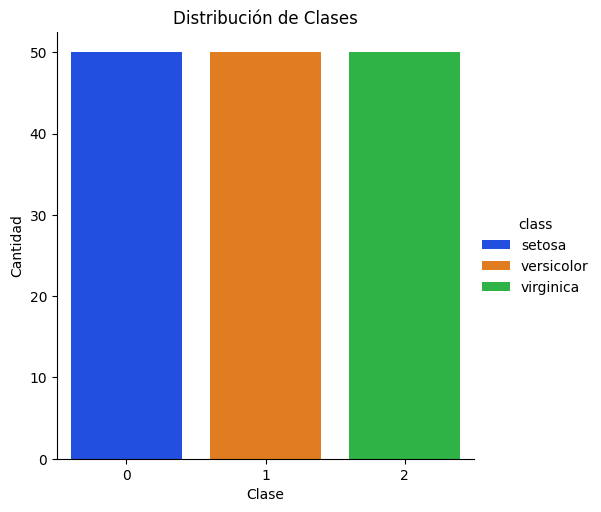

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

print('Instancias por clase')
print(df_iris.groupby(['target', 'class']).size())

sns.catplot(x='target', data=df_iris, kind='count', hue='class', palette='bright')
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

### 3. Preparación de datos para el entrenamiento

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_iris, test_size=0.33, random_state=42)

# Reset index to maintain an order
train.reset_index(inplace = True)
test.reset_index(inplace = True)

print("Conjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())

Conjunto de entrenamiento:
   index  sepal_length  sepal_width  petal_length  petal_width  target  \
0     96           5.7          2.9           4.2          1.3       1   
1    105           7.6          3.0           6.6          2.1       2   
2     66           5.6          3.0           4.5          1.5       1   
3      0           5.1          3.5           1.4          0.2       0   
4    122           7.7          2.8           6.7          2.0       2   

        class  
0  versicolor  
1   virginica  
2  versicolor  
3      setosa  
4   virginica  

Conjunto de prueba:
   index  sepal_length  sepal_width  petal_length  petal_width  target  \
0     73           6.1          2.8           4.7          1.2       1   
1     18           5.7          3.8           1.7          0.3       0   
2    118           7.7          2.6           6.9          2.3       2   
3     78           6.0          2.9           4.5          1.5       1   
4     76           6.8          2.8      

### 3. Validación cruzada

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier    
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate

#iris = load_iris()

classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

scoring = ['precision', 'recall', 'f1']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target == 1, cv=5,
                        scoring=scoring, return_train_score=False)


In [7]:
X_train = train[['class_1', 'class_2']]
y_train = train['target']
X_test = test[['class_1', 'class_2']]
y_test = test['target']

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB(), ComplementNB(), CategoricalNB()]

for clf_value in (classifiers):
    clf_value.fit(X_train, y_train)
    y_pred = clf_value.predict(X_test)    

    # Mostrar el informe de clasificación
    print(f"\nInforme de clasificación: {clf_value}")
    print(classification_report(y_test, y_pred, target_names=['class_1', 'class_2']))

KeyError: "None of [Index(['class_1', 'class_2'], dtype='object')] are in the [columns]"